# HW 11 Assignment 1
Nurvirta Monarizqa (nm2773)

In [8]:
# import all necessary packages
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import os

In [2]:
PUIDATA = os.getenv('PUIDATA')

In [3]:
# import shapefile
# here I use shapefile from this link:
# http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
# it is a shapefile clipped to shoreline (without water area)

shape_path = PUIDATA + "/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.crs = from_epsg(2263)

In [4]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [5]:
# convert latlon and subset Brooklyn

ct_latlon = ct_shape.to_crs(epsg=4326)
ct_latlon = ct_latlon[ct_latlon.BoroName == 'Brooklyn']

In [6]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [9]:
# I looked up Google Maps and get this coordinate for CUSP
cusp = shapely.geometry.Point(-73.986733,40.692955)

In [10]:
# search within every geometry to find a shapefile contains CUSP point

cusp_index = 0
for i, ct in zip(ct_latlon.index, ct_latlon.geometry):
    if shapely.geometry.asShape(ct).contains(cusp):
        print 'CUSP is contained in',ct
        cusp_index = i

CUSP is contained in POLYGON ((-73.98622595691907 40.69308831340506, -73.98627231669104 40.69219479463375, -73.98729894947923 40.69223407539822, -73.98725396415627 40.6931249027317, -73.98622595691907 40.69308831340506))


In [11]:
# index where the geometry contains CUSP
cusp_index

7591

(-74.05, -73.85)

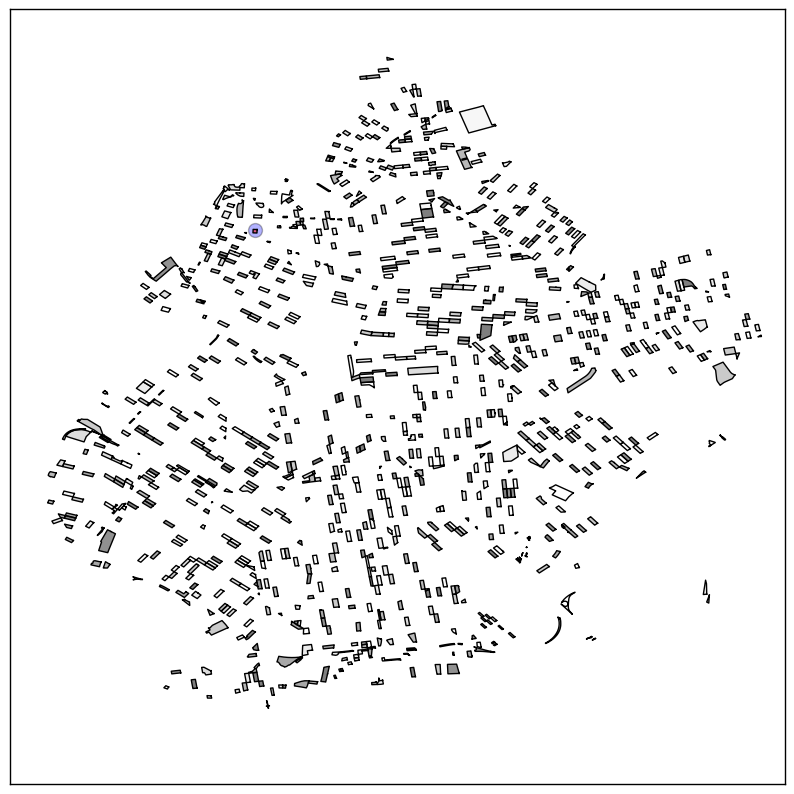

In [12]:
# plot every 10 index
# select the indices using np.arange
# polygon contains CUSP is colored in red
# CUSP --> purple point

selected_index = np.arange(ct_latlon.index.min(),ct_latlon.index.max(),10)

f, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# only plot non-NA rows
ct_latlon.ix[selected_index].dropna().plot(figsize=(15,10),
                                          cmap='Greys', ax=ax)

# plot CUSP shapefile with red color
GeoDataFrame(ct_latlon.ix[cusp_index]).T.plot(ax=ax, color='r')

# plot CUSP point
plt.scatter(-73.986733,40.692955, s=100, c='b', alpha=0.3)
plt.xlim(-74.05,-73.85)
